<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/3_Pima_diabetes_data_with_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 구성

Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 <br>
BloodPressure : 이완기 혈압 (mm Hg) <br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값 <br>
Insulin : 2시간 혈청 인슐린 (mu U / ml) <br>
BMI : 체질량 지수 (체중kg / 키(m)^2) <br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능 <br>
Age : 나이 <br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


##EDA

###1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "/content/drive/MyDrive/Colab Notebooks/부스트코스/data/"
df = pd.read_csv(PATH + "diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 수치데이터에 대한 요약: 평균, 중위값, 최대/최소값 등...
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Pregnancies는 최소값이 0이 될 수 있음
# Glucose의 25% 값이 99인데 최소값이 0 --> 결측치로 보임
# BloodePressure이 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# SkinThickness가 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# BMI도 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임

In [10]:
# (숫자형 데이터에 대한 요약)
#df.describe(include="number")

### 2. 결측치 시각화

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
feature_columns = df.columns[:-1].to_list()

In [13]:
cols = feature_columns[1:] # Pregnancies는 결측치가 없는 것으로 보이므로 제외
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [14]:
# 결측치 여부를 나타내는 데이터프레임을 만듦
# 0을 결측치라 가정하고, 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 담음

df_null = df[cols].replace(0, np.nan) # 0인 값을 결측치로 변경
df_null = df_null.isnull()
df_null.sum() # 결측치 개수

# => 이전 분석에서 Insulin이 중요한 피쳐로 나타나지 않았는데,
# 상식적으로는 당뇨병에 인슐린 수치가 많은 영향을 미칠 것으로 생각됨에도
# Insulin의 결측치가 많아서 중요한 피쳐로 나타나지 않은 것으로 보임

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

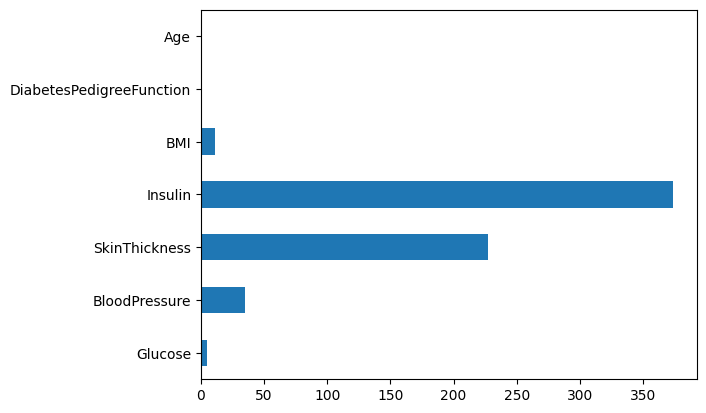

In [15]:
df_null.sum().plot.barh()

In [16]:
# 결측치의 비율 (한 컬럼당 결측치의 비율)
df_null.mean() * 100

# -> Insulin의 48%가 결측치

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

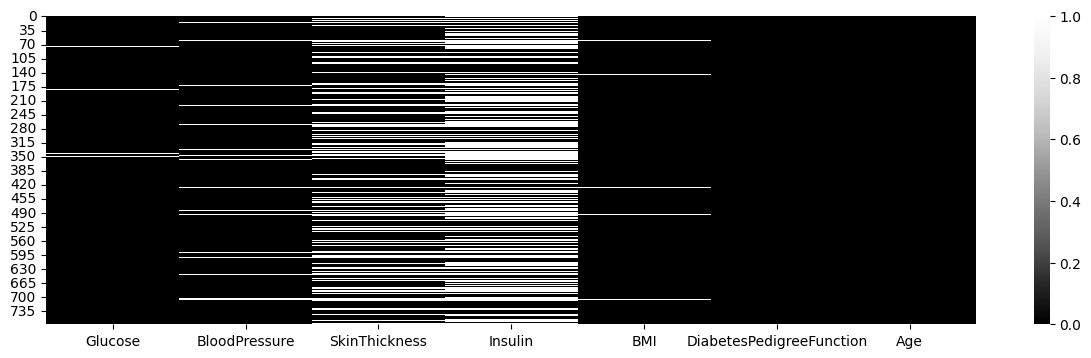

In [17]:
# 결측치를 heatmap으로 시각화
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

# 결측치는 흰색

### 3. 정답값 살펴보기

In [18]:
# 정답값인 Outcome의 개수 확인
df["Outcome"].value_counts()

# 당뇨병이 발병하면 1, 그렇지 않으면 0

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
# 정답값인 Outcome의 비율 확인
df["Outcome"].value_counts(normalize=True)

# -> 발병하는 비율이 34%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [20]:
# 다른 변수와 함께 보기 (ex) 임신 횟수에 따른 당뇨 발병 비율 및 빈도)
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
# (인덱스에 올 column, value에 올 column)
df_po

# -> 임신 횟수가 많아질수록 당뇨 발병 비율이 높아짐
# 이 데이터에서, 임신 횟수가 14명 이상이면 당뇨가 100% 발병되는 것으로 나타남
# 하지만 14번 이상 임신한 경우가 많지 않음 (데이터 수가 적음)

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

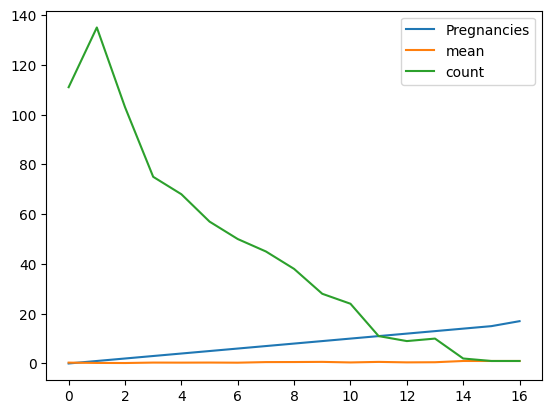

In [21]:
# 위의 결과 시각화
# 하지만, 단위가 다르기 때문에 다 같이 표현하는 것 적합하지 않아 보임
df_po.plot()

<Axes: >

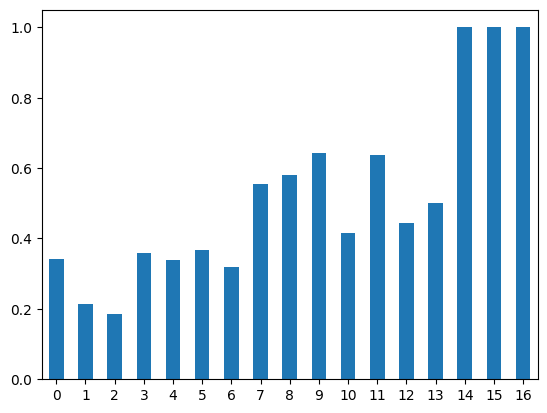

In [22]:
# 임신횟수에 따른 당뇨병 발병 비율 시각화
df_po["mean"].plot.bar(rot=0)
# rot: 글씨 rotation

### 4. Countplot

Countplot은 보통 한 개의 범주형 변수를 표현할 때 많이 사용한다.

<ipython-input-23-8b87634f7295>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outcome", palette=palette)


<Axes: xlabel='Outcome', ylabel='count'>

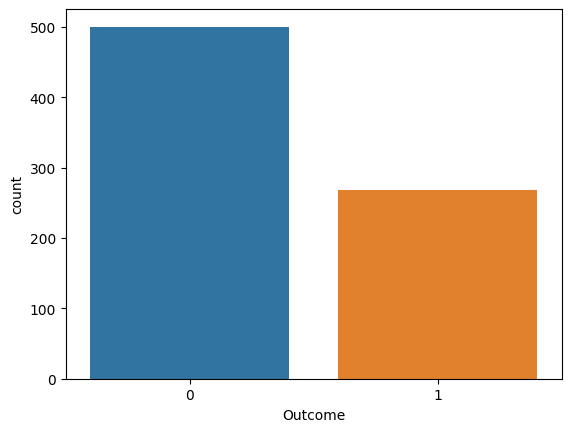

In [23]:
# 당뇨병 발병 빈도수 비교
palette = sns.color_palette('tab10', 2)
sns.countplot(data=df, x="Outcome", palette=palette)

<Axes: xlabel='Pregnancies', ylabel='count'>

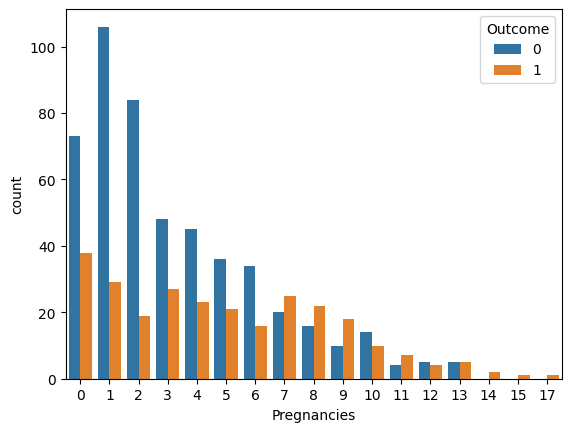

In [24]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

# -> 임신 횟수 7번 이상부터 발병 빈도가 발병하지 않은 빈도보다 더 높아짐
# 조건이 많아지면 case가 적은 경우 overfitting이 발생할 수 있다.
# 그래서 이런 경우엔 범주형 변수로 바꾸어 사용한다.

In [25]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듦

df["Pregnancies_high"] = df["Pregnancies"] > 6 # 임신 횟수가 7명 이상인 경우
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

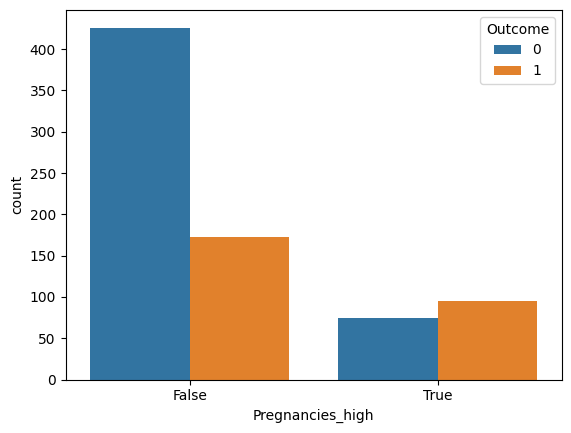

In [29]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", palette=palette, hue="Outcome")
# -> 임신 횟수가 적은 그룹에서는 당뇨병 발병 비율이 상대적으로 적지만,
# 임신 횟수가 많은 그룹에서는 당뇨병 발병 비율이 조금 더 높다.

### 5. Barplot

<ipython-input-31-b7e4bee0ea9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="BMI", palette=palette)


<Axes: xlabel='Outcome', ylabel='BMI'>

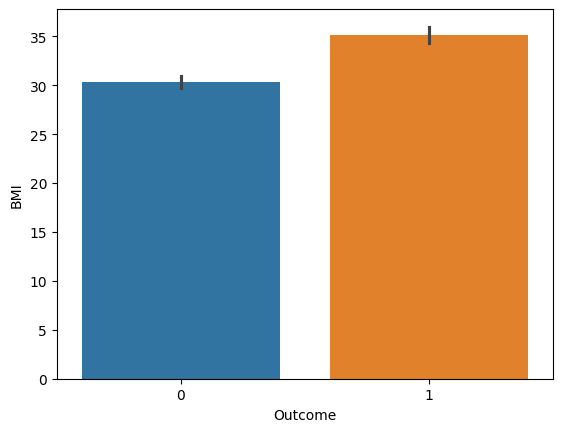

In [31]:
# 당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x="Outcome", y="BMI", palette=palette)

<ipython-input-33-b83ac6bb508e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="Glucose", palette=palette)


<Axes: xlabel='Outcome', ylabel='Glucose'>

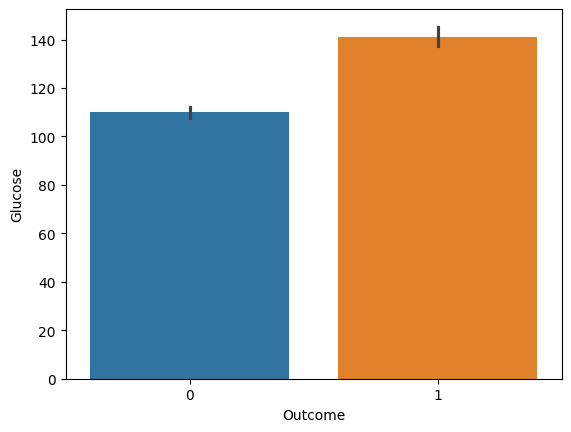

In [33]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치를 비교
sns.barplot(data=df, x="Outcome", y="Glucose", palette=palette)

<ipython-input-35-2dba436b5fc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="Insulin", palette=palette)


<Axes: xlabel='Outcome', ylabel='Insulin'>

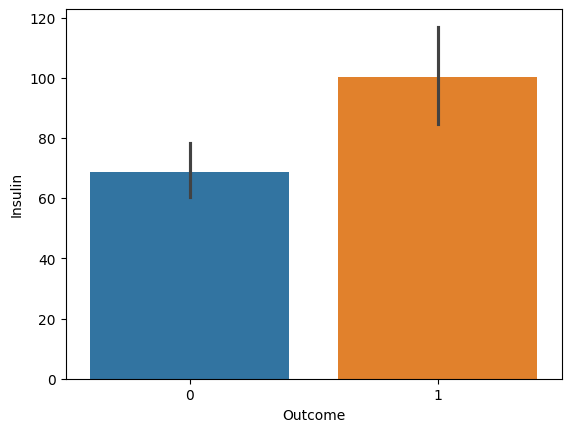

In [35]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x="Outcome", y="Insulin", palette=palette)

# 검은색 막대: bootstrap(일부를 샘플링하여 일부 데이터의 95% 신뢰구간)
# Outcome=1인 경우 신뢰구간의 범위가 크게 나타나고 있다.

<ipython-input-39-cd68602138f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Pregnancies", y="Outcome", palette="husl")


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

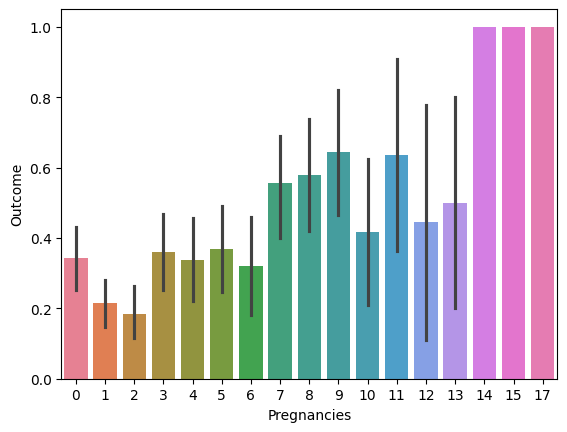

In [39]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data=df, x="Pregnancies", y="Outcome", palette="husl")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

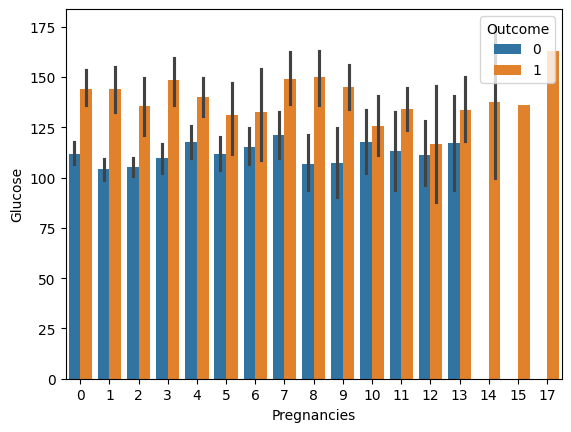

In [43]:
# 임신 횟수에 따른 포도당 수치를 당뇨병 발병 여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome", palette=palette)

# -> 당뇨병에 걸린 사람의 포도당 수치가 더 높게 나타난다.

<Axes: xlabel='Pregnancies', ylabel='BMI'>

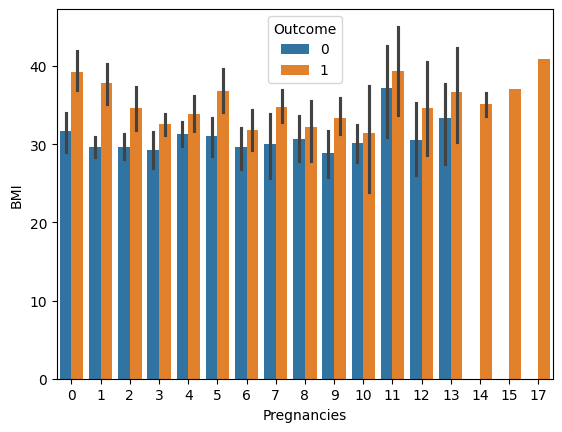

In [44]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome", palette=palette)

# -> 당뇨병이 발병한 사람들의 BMI가 더 높다.

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

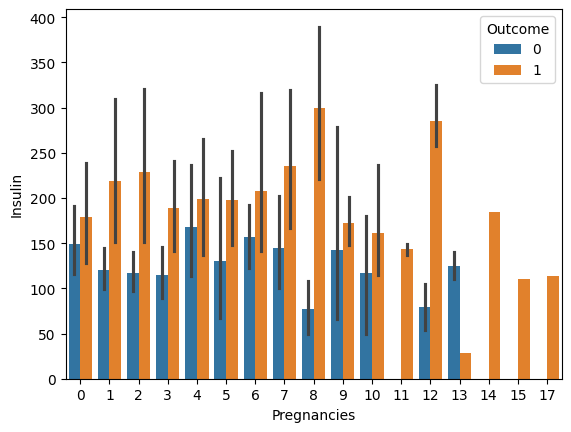

In [78]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# (인슐린 수치에는 결측치가 많기 때문에, 0보다 큰 값에 대해서만 그림)

sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

###6. Boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

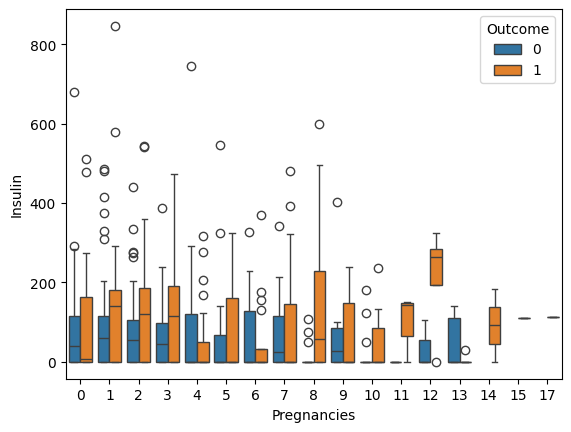

In [47]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# A: 인슐린이 0인 값을 포함한 경우의 그래프

sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")
# -> boxplot이 주저앉아 있는 구간이 있다. 그 구간에 인슐린 결측치가 많기 때문

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

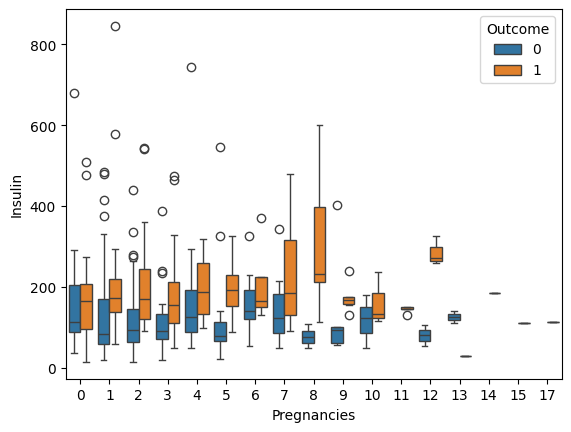

In [55]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# B: 인슐린이 0인 값을 제외한 경우의 그래프

sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

###7. Violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

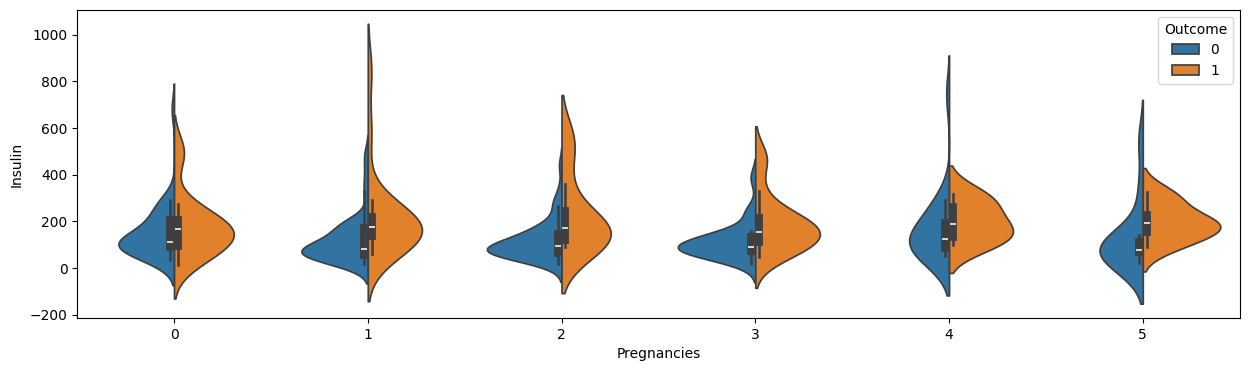

In [69]:
# 위의 그래프를 violinplot으로 시각화
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[(df.Insulin > 0) & (df.Pregnancies < 6)], # (시각화를 위해 Pregnancies 수를 제한함)
               x="Pregnancies", y="Insulin", hue="Outcome", split=True)

###8. Swarmplot

Swarmplot은 산포도를 그리는 데 적합하다.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


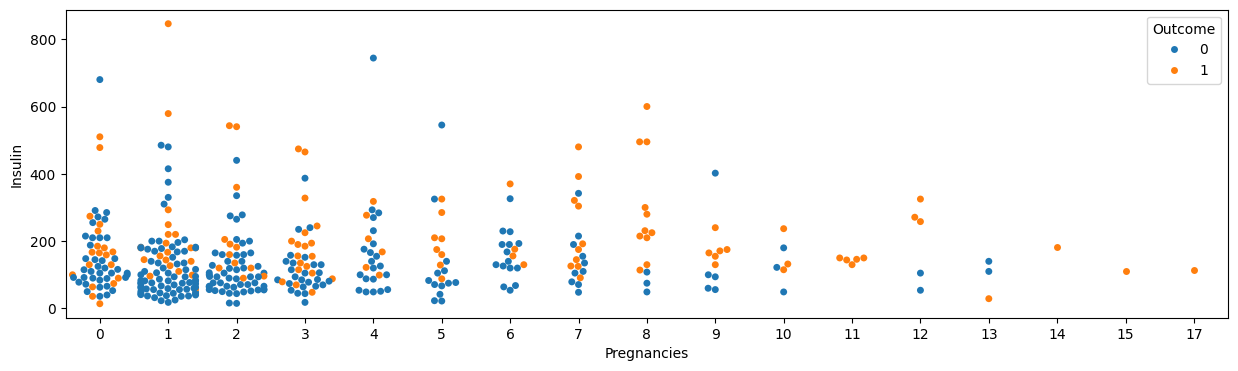

In [74]:
# 위의 그래프를 Swarmplot으로 시각화 (이번엔 Pregnancies 제한 안 함)

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"]>0],
               x="Pregnancies", y="Insulin", hue="Outcome")

# 임신 횟수가 많은 경우의 데이터 수가 매우 적다는 것을 알 수 있다.

###9. Distplot

Distplot은 보통 한 개의 연속형(수치형) 변수를 표현할 때 사용한다.

In [81]:
df_0 = df[df["Outcome"] == 0] # 당뇨병이 발병하지 않은 케이스
df_1 = df[df["Outcome"] == 1] # 당뇨병이 발병한 케이스

df_0.shape, df_1.shape

((500, 10), (268, 10))

<ipython-input-82-091d699fbbcb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
<ipython-input-82-091d699fbbcb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

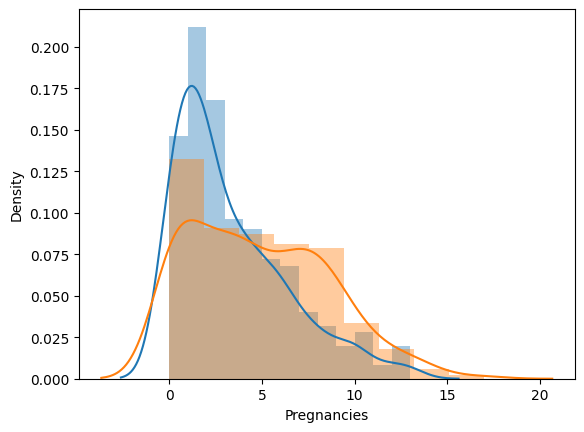

In [82]:
# 임신 횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])
# (a는 series, hist는 히스토그램 표시 여부, kde는 밀도추정곡선, rug는 밑에 데이터 빈도 표시 여부)

# 임신 횟수가 대략 5번을 넘어가면 당뇨병 발병 케이스가 많아지는 것으로 보인다.

<ipython-input-94-cd505b02298e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
<ipython-input-94-cd505b02298e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist=False, rug=True, label="1")


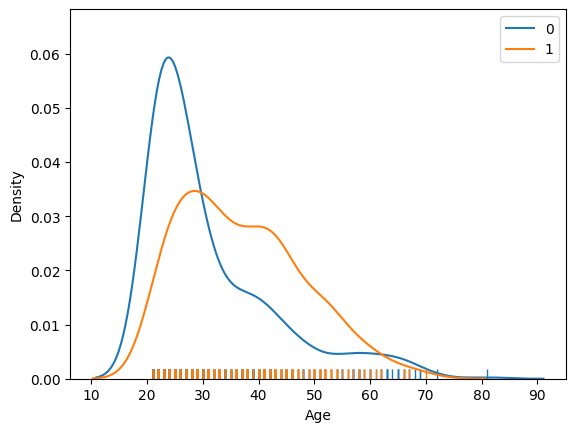

In [94]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")
plt.legend()
plt.show()

# 나이대가 30대를 넘어가면 당뇨병 발병 케이스가 많아지는 것으로 보인다.